In [16]:
import pandas as pd

# Loading the Excel file
file_path = r"D:/Data Analyst Intern Assignment - Excel.xlsx"

# Load each sheet into a DataFrame
users = pd.read_excel(file_path, sheet_name='UserDetails.csv')
sessions = pd.read_excel(file_path, sheet_name='CookingSessions.csv')
orders = pd.read_excel(file_path, sheet_name='OrderDetails.csv')

# Displaying the first few rows of each DataFrame to inspect the data
print("Users Data:")
print(users.head())

print("\nCooking Sessions Data:")
print(sessions.head())

print("\nOrder Details Data:")
print(orders.head())


Users Data:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  

Cooking Sessions Data:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar S

In [17]:
# Checking for missing values
print("Missing values in Users:")
print(users.isnull().sum())

print("\nMissing values in Cooking Sessions:")
print(sessions.isnull().sum())

print("\nMissing values in Order Details:")
print(orders.isnull().sum())

# Checking for duplicates
print("\nDuplicates in Users:", users.duplicated().sum())
print("Duplicates in Cooking Sessions:", sessions.duplicated().sum())
print("Duplicates in Order Details:", orders.duplicated().sum())

# Checking data types
print("\nData Types in Users:")
print(users.dtypes)

print("\nData Types in Cooking Sessions:")
print(sessions.dtypes)

print("\nData Types in Order Details:")
print(orders.dtypes)


Missing values in Users:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing values in Cooking Sessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing values in Order Details:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

Duplicates in Users: 0
Duplicates in Cooking Sessions: 0
Duplicates in Order Details: 0

Data Types in Users:
User ID                      object
User Name                    object
Age                           int64
Location                     object
Registration Date    datetime64[ns]
Phone              

In [18]:
# Merge Users with Sessions
merged_users_sessions = pd.merge(users, sessions, on="User ID", how="inner")

# Merge with Orders
merged_data = pd.merge(merged_users_sessions, orders, on=["User ID", "Session ID"], how="inner")

# Inspect merged data
print("\nMerged Data:")
print(merged_data.head())



Merged Data:
  User ID      User Name  Age     Location Registration Date         Phone  \
0    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
1    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
2    U001  Alice Johnson   28     New York        2023-01-15  123-456-7890   
3    U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   
4    U002      Bob Smith   35  Los Angeles        2023-02-20  987-654-3210   

             Email Favorite Meal  Total Orders Session ID  ...  \
0  alice@email.com        Dinner            12       S001  ...   
1  alice@email.com        Dinner            12       S004  ...   
2  alice@email.com        Dinner            12       S009  ...   
3    bob@email.com         Lunch             8       S002  ...   
4    bob@email.com         Lunch             8       S006  ...   

  Duration (mins) Session Rating Order ID Order Date  Meal Type_y  \
0              30            4.5     1001 2024-12-0

In [19]:
# Correlation between session duration and order amount
correlation = merged_data['Duration (mins)'].corr(merged_data['Amount (USD)'])
print(f"Correlation between session duration and order amount: {correlation}")


Correlation between session duration and order amount: 0.6450018005206265


In [21]:
# Popular dishes
popular_dishes = merged_data['Dish Name_y'].value_counts()
print("\nPopular Dishes:")
print(popular_dishes)



Popular Dishes:
Dish Name_y
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [24]:
# Grouping by age groups and calculating the average order amount
average_order_by_age = merged_data.groupby(age_groups, observed=False)['Amount (USD)'].mean()

print("\nAverage Order Amount by Age Group:")
print(average_order_by_age)



Average Order Amount by Age Group:
Age
18-30    11.0
31-40    10.0
41-50    12.0
Name: Amount (USD), dtype: float64


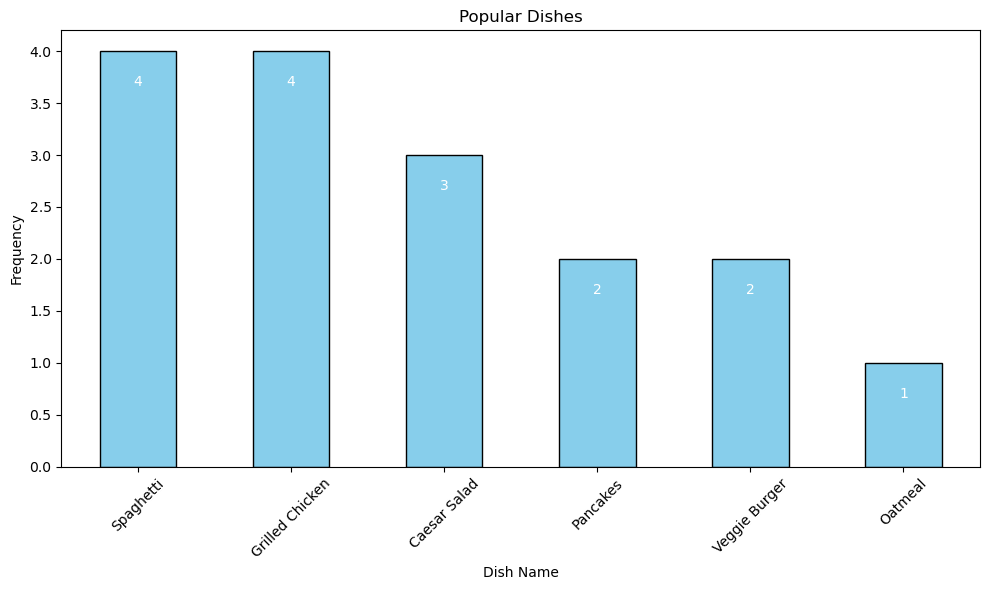

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort popular dishes in descending order
popular_dishes_sorted = popular_dishes.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = popular_dishes_sorted.plot(kind='bar', title="Popular Dishes", color='skyblue', edgecolor='black')
for i, v in enumerate(popular_dishes_sorted):
    ax.text(i, v - 0.3, str(v), ha='center', va='center', fontsize=10, color='white') 

plt.xlabel("Dish Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


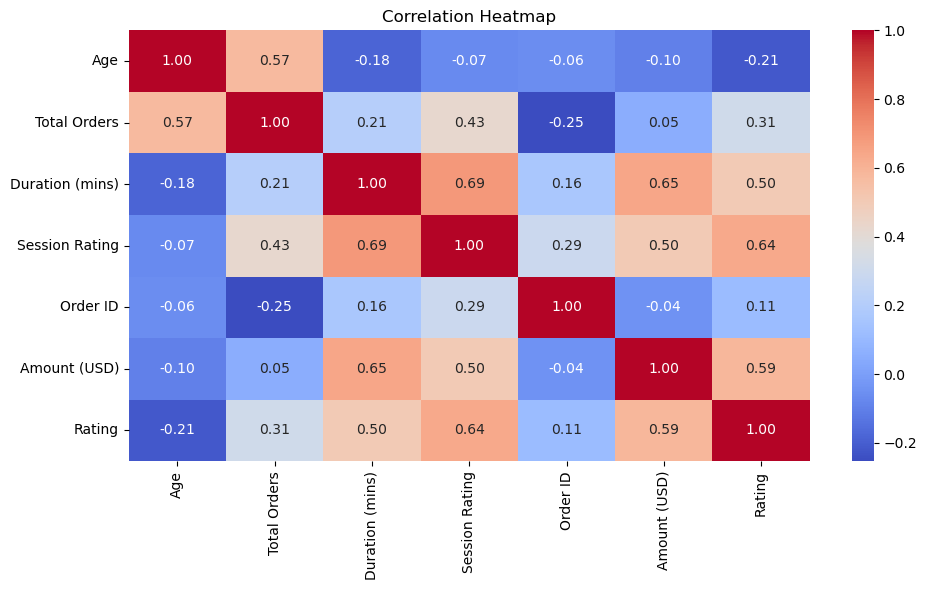

In [35]:

# Heatmap for correlations
numeric_data = merged_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


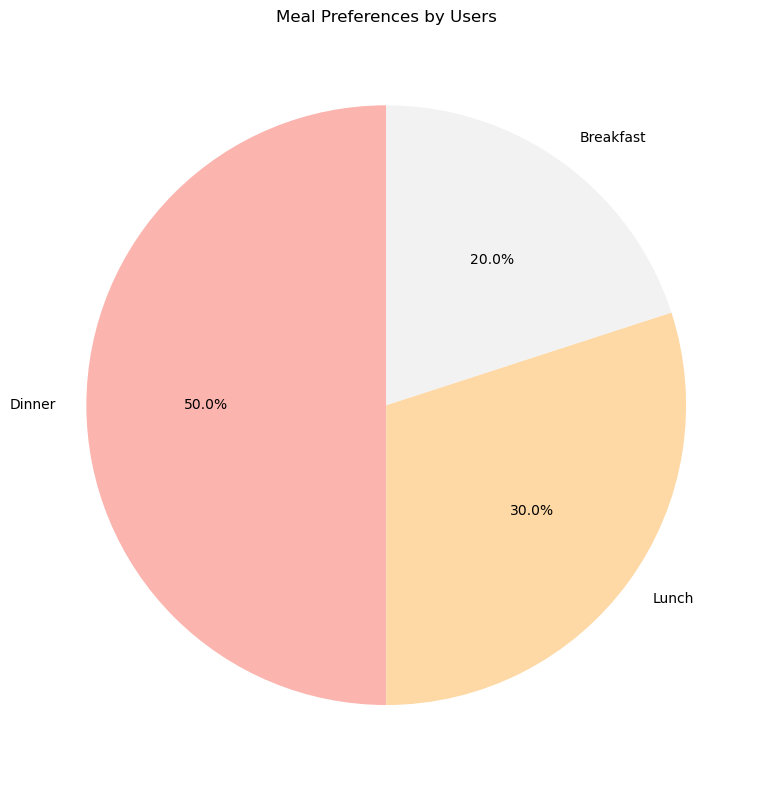

In [28]:

# Pie chart for meal preferences
meal_preferences = users['Favorite Meal'].value_counts()

plt.figure(figsize=(8, 8))
meal_preferences.plot(kind='pie', autopct='%1.1f%%', title="Meal Preferences by Users", startangle=90, colormap="Pastel1")
plt.ylabel('') 
plt.tight_layout()
plt.show()

